## Adult-salary Prediction dataset

We want you to predict whether a customer is interested in a caravan insurance policy from
other data about the customer. Information about customers consists of 86 variables and
includes product usage data and socio-demographic data derived from zip area codes. The
data was supplied by the Dutch data mining company Sentient Machine Research and is
based on a real-world business problem. The training set contains over 5000 descriptions of
customers, including the information on whether or not they have a caravan insurance
policy. A test set contains 4000 customers

1. Data Cleaning
2. EDA + Insights
3. Feature Engineering
4. Model Building

### Import Library

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

from IPython.display import Markdown, display



In [100]:
# Markdown purpose

def printmd(string):
    display(Markdown(string))


In [102]:
### Loading Dataset

printmd('### 1.1 Load Dataset')
df = pd.read_csv('adult.csv')
df.head(5)

### 1.1 Load Dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [103]:
printmd('#### Missing Values')
df.isnull().sum()

#### Missing Values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [105]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

In [106]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [108]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [113]:
printmd("### Data Cleaning")
print(""" Here We can see Some Categorical Variable have special Character in place of Missing Values|""")

### Data Cleaning

 Here We can see Some Categorical Variable have special Character in place of Missing Values|


In [114]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [115]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [116]:
df['country'].value_counts()


 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [119]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [120]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [121]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [122]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

### Countplot

 we can see how countplot is behave between relationship and salary variables 
It shows that not in family has high chances of having <=50 and vice and verca


C:\Users\SHAIKH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


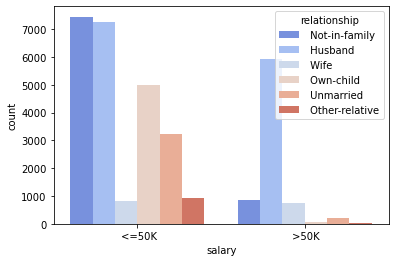

In [124]:
printmd("### Countplot")
print(""" we can see how countplot is behave between relationship and salary variables 
It shows that not in family has high chances of having <=50 and vice and verca""")
sns.countplot(df['salary'], palette='coolwarm', hue='relationship', data=df);

In [125]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [132]:
printmd("### Handling Missing Values")
print("""As we can see Amount of Missing values are High and we cannot remove it and
its categorical Data We will be Going to take Mode Value to fill The Value 
""")

### Handling Missing Values

As we can see Amount of Missing values are High and we cannot remove it and
its categorical Data We will be Going to take Mode Value to fill The Value 



In [133]:
print("workclass mode value: ",df.workclass.mode())
print("occupation  mode value : ",df.occupation.mode())
print("country mode value :",df.country.mode())

workclass mode value:  0     Private
dtype: object
occupation  mode value :  0     Prof-specialty
dtype: object
country mode value : 0     United-States
dtype: object


In [135]:

###  replace the values with mode

df['workclass'] = df['workclass'].replace(' ?', 'Private')
df['occupation'] = df['occupation'].replace(' ?', 'Prof-specialty')
df['country'] = df['country'].replace(' ?', 'United-States')

df.head(8)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [137]:
## Here we can see Now  there is no Special character
df.workclass.unique()


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Private', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [155]:

print(""" As we can see there is spaces in between  we mannually inputed""")


 As we can see there is spaces in between  we mannually inputed
['undergrad' 'high school' 'school' 'grad' 'higher' 'doc']


In [156]:
# education Category
df.education= df.education.replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], 'school')
df.education = df.education.replace(' HS-grad', 'high school')
df.education = df.education.replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], 'higher')
df.education = df.education.replace(' Bachelors', 'undergrad')
df.education = df.education.replace(' Masters', 'grad')
df.education = df.education.replace(' Doctorate', 'doc')
print(df.education.unique())

['undergrad' 'high school' 'school' 'grad' 'higher' 'doc']


In [157]:
#martial status
df['marital-status']= df['marital-status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'married')
df['marital-status']= df['marital-status'].replace([' Never-married'], 'not-married')
df['marital-status']= df['marital-status'].replace([' Divorced', ' Separated',' Widowed',
                                                   ' Married-spouse-absent'], 'other')
print(df['marital-status'].unique())

['not-married' 'married' 'other']


In [60]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,not-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [158]:
# Mannually Encoding of Salary feature

df.salary = df.salary.replace('<=50K', 0)
df.salary = df.salary.replace('>50K', 1)

In [159]:
df['marital-status'].value_counts()

married        14999
not-married    10683
other           6879
Name: marital-status, dtype: int64

In [160]:
df['education'].value_counts()

high school    10501
higher         10316
undergrad       5355
school          4253
grad            1723
doc              413
Name: education, dtype: int64

In [161]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


### Heatmap

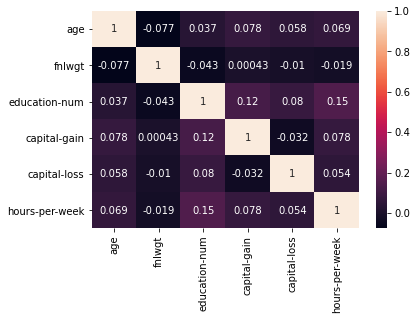

In [162]:
printmd("### Heatmap")

sns.heatmap(df.corr(), annot=True);


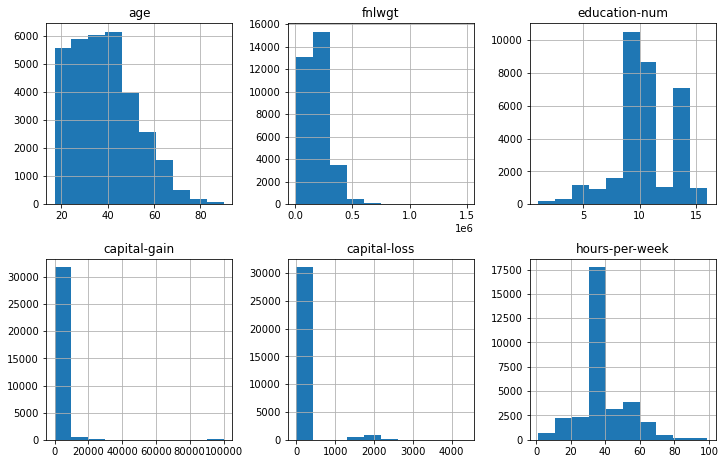

In [163]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

<AxesSubplot:>

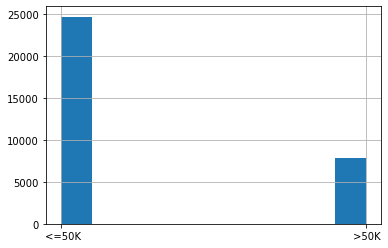

In [164]:
df.salary.hist()

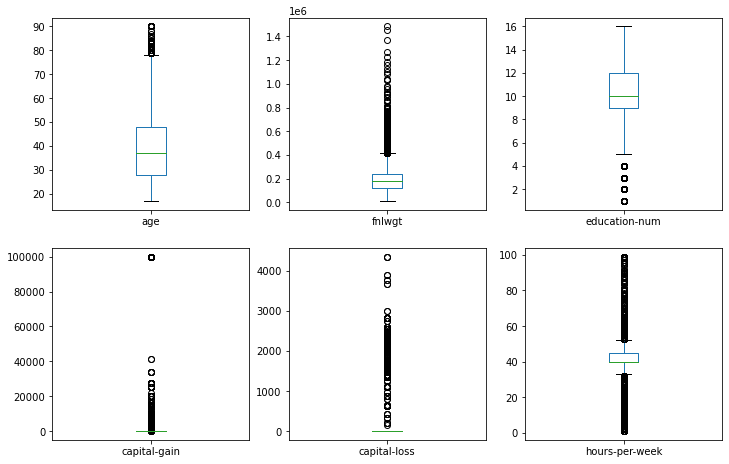

In [165]:

df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);


C:\Users\SHAIKH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



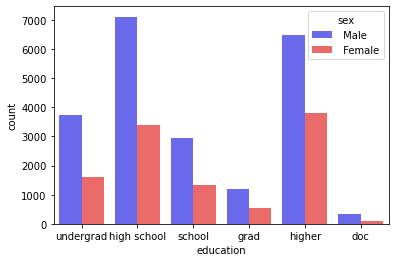

In [170]:
sns.countplot(df['education'], hue='sex', data=df, palette='seismic');

In [171]:
printmd("### Feature Scalling")

### Feature Scalling

In [172]:
X= df.drop(['salary'], axis=1)
y = df['salary']

In [173]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [174]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,22,6,2671,5,12,1,0,1,4,1,25,0,39,38,0
1,33,5,2926,5,12,0,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,4,6,0,5,0,2,1,0,0,39,38,0
4,11,3,19355,5,12,0,9,5,2,0,0,0,39,4,0


In [175]:
ss= StandardScaler().fit(df1.drop('salary', axis=1))

In [176]:
X= ss.transform(df1.drop('salary', axis=1))
y= df['salary']

### Train Test Split

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

### Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.841
Acc on test data: 0.833


### Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

r_forestc = RandomForestClassifier()

model1 = r_forestc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(r_forestc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(r_forestc.score(X_test, y_test)))

Acc on training data: 1.000
Acc on test data: 0.856


In [184]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [185]:
print(confusion_matrix(y_test, prediction1))

[[6887  510]
 [ 897 1475]]


In [182]:

print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7397
        >50K       0.74      0.62      0.67      2372

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



In [186]:
#Precision: tp/tp+fp

print('Precision =' , 1475/(1475+510))
    

Precision = 0.743073047858942
